In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
R = 114.6 / 1000
r = 30.5 / 1000
g = 9.8155
z0 = np.sqrt(2.14**2 - R**2)
k = g*r*R/(4*np.pi**2*z0)
k

0.0004066745488010794

In [3]:
no_load = pd.read_csv('no_load.csv', index_col=0)
m_no_load = 0.9832
T_no_load_series = no_load['t']/no_load['N']

T_no_load = T_no_load_series.mean()
T_no_load_err = T_no_load_series.std() / np.sqrt(len(T_no_load_series) - 1)

I0 = k*m_no_load*T_no_load**2
I0_err = 2 * I0 * T_no_load_err / T_no_load
print(f'{T_no_load=:.4}±{T_no_load_err:.1}')
print(f'{I0=:.6f}±{I0_err:.1}')
no_load['T'] = no_load['t'] / no_load['N']
print(no_load['T'].mean())

T_no_load=4.399±0.002
I0=0.007738±8e-06
4.3991454545454545


In [5]:
ring = pd.read_csv('ring.csv', index_col=0)
m_ring = 0.9817
T_ring_series = ring['t']/ring['N']

T_ring = T_ring_series.mean()
T_ring_err = T_ring_series.std() / np.sqrt(len(T_ring_series) - 1)

I0_Ir = k*(m_no_load + m_ring)*T_ring**2
I0_Ir_err = 2 * I0_Ir * T_ring_err / T_ring
print(f'{T_ring=:.4}±{T_ring_err:.1}')
print(f'{I0_Ir=:.5f}±{I0_Ir_err:.1}')

Ir = I0_Ir - I0
Ir_err = np.sqrt(I0_err**2 + I0_Ir_err**2)
print(f'   {Ir=:.5f}±{Ir_err:.1}')
Ir_theor = m_ring * (0.08175)**2
print(f'{Ir_theor=:.5f}')
ring['T'] = ring['t'] / ring['N']
print(ring.style.to_latex())

T_ring=4.242±0.002
I0_Ir=0.01438±1e-05
   Ir=0.00664±1e-05
Ir_theor=0.00656
\begin{tabular}{lrrr}
 & N & t & T \\
No &  &  &  \\
1 & 10 & 42.459000 & 4.245900 \\
2 & 10 & 42.428000 & 4.242800 \\
3 & 10 & 42.426000 & 4.242600 \\
4 & 10 & 42.385000 & 4.238500 \\
\end{tabular}



In [7]:
disc = pd.read_csv('disc.csv', index_col=0)
m_disc = 0.5806
T_disc_series = disc['t']/disc['N']

T_disc = T_disc_series.mean()
T_disc_err = T_disc_series.std() / np.sqrt(len(T_disc_series) - 1)

I0_Id = k*(m_no_load + m_disc)*T_disc**2
I0_Id_err = 2 * I0_Id * T_disc_err / T_disc
print(f'{T_disc=:.4}±{T_disc_err:.1}')
print(f'{I0_Id=:.6f}±{I0_Id_err:.1}')

Id = I0_Id - I0
Id_err = np.sqrt(I0_err**2 + I0_Id_err**2)
print(f'   {Id=:.5f}±{Id_err:.1}')
disc['T'] = disc['t'] / disc['N']
print(disc.style.to_latex())

T_disc=3.922±0.002
I0_Id=0.009781±8e-06
   Id=0.00204±1e-05
\begin{tabular}{lrrr}
 & N & t & T \\
No &  &  &  \\
1 & 10 & 39.254000 & 3.925400 \\
2 & 10 & 39.221000 & 3.922100 \\
3 & 10 & 39.203000 & 3.920300 \\
4 & 10 & 39.189000 & 3.918900 \\
\end{tabular}



In [8]:
rd = pd.read_csv('disc_ring.csv', index_col=0)
T_rd_series = rd['t']/rd['N']

T_rd = T_rd_series.mean()
T_rd_err = T_rd_series.std() / np.sqrt(len(T_rd_series) - 1)

I0_Ird = k*(m_no_load + m_disc + m_ring)*T_rd**2
I0_Ird_err = 2 * I0_Ird * T_rd_err / T_rd
print(f'{T_rd=:.4}±{T_rd_err:.1}')
print(f'{I0_Ird=:.6f}±{I0_Ird_err:.1}')

Ird = I0_Ird - I0
Ird_err = np.sqrt(I0_err**2 + I0_Ird_err**2)
print(f'   {Ird=:.5f}±{Ird_err:.1}')
rd['T'] = rd['t'] / rd['N']
print(rd.style.to_latex())

T_rd=3.984±0.006
I0_Ird=0.016431±5e-05
   Ird=0.00869±5e-05
\begin{tabular}{lrrr}
 & N & t & T \\
No &  &  &  \\
1 & 10 & 39.750000 & 3.975000 \\
2 & 10 & 39.873000 & 3.987300 \\
3 & 10 & 39.964000 & 3.996400 \\
4 & 10 & 39.773000 & 3.977300 \\
\end{tabular}



In [9]:
data_orig = pd.read_csv('cut_disc.csv')
# print(data)
data = data_orig.groupby('h').mean().div(10)
error = data_orig.groupby('h').std()['t']
data['dT'] = error
data
print(data.style.to_latex())

\begin{tabular}{lrr}
 & t & dT \\
h &  &  \\
0.000000 & 3.065633 & 0.058774 \\
0.500000 & 3.084967 & 0.053873 \\
1.000000 & 3.106300 & 0.030447 \\
1.500000 & 3.131167 & 0.008505 \\
2.000000 & 3.162033 & 0.009452 \\
2.500000 & 3.205000 & 0.018682 \\
3.000000 & 3.276300 & 0.025515 \\
3.500000 & 3.350133 & 0.019009 \\
4.000000 & 3.432500 & 0.032924 \\
4.500000 & 3.528200 & 0.016462 \\
5.000000 & 3.625800 & 0.029513 \\
5.500000 & 3.723333 & 0.025697 \\
6.000000 & 3.848467 & 0.008963 \\
6.500000 & 3.967833 & 0.022745 \\
7.000000 & 4.091967 & 0.018009 \\
7.500000 & 4.224333 & 0.016773 \\
\end{tabular}



a=0.14929285577663698
b=9.41869560023044


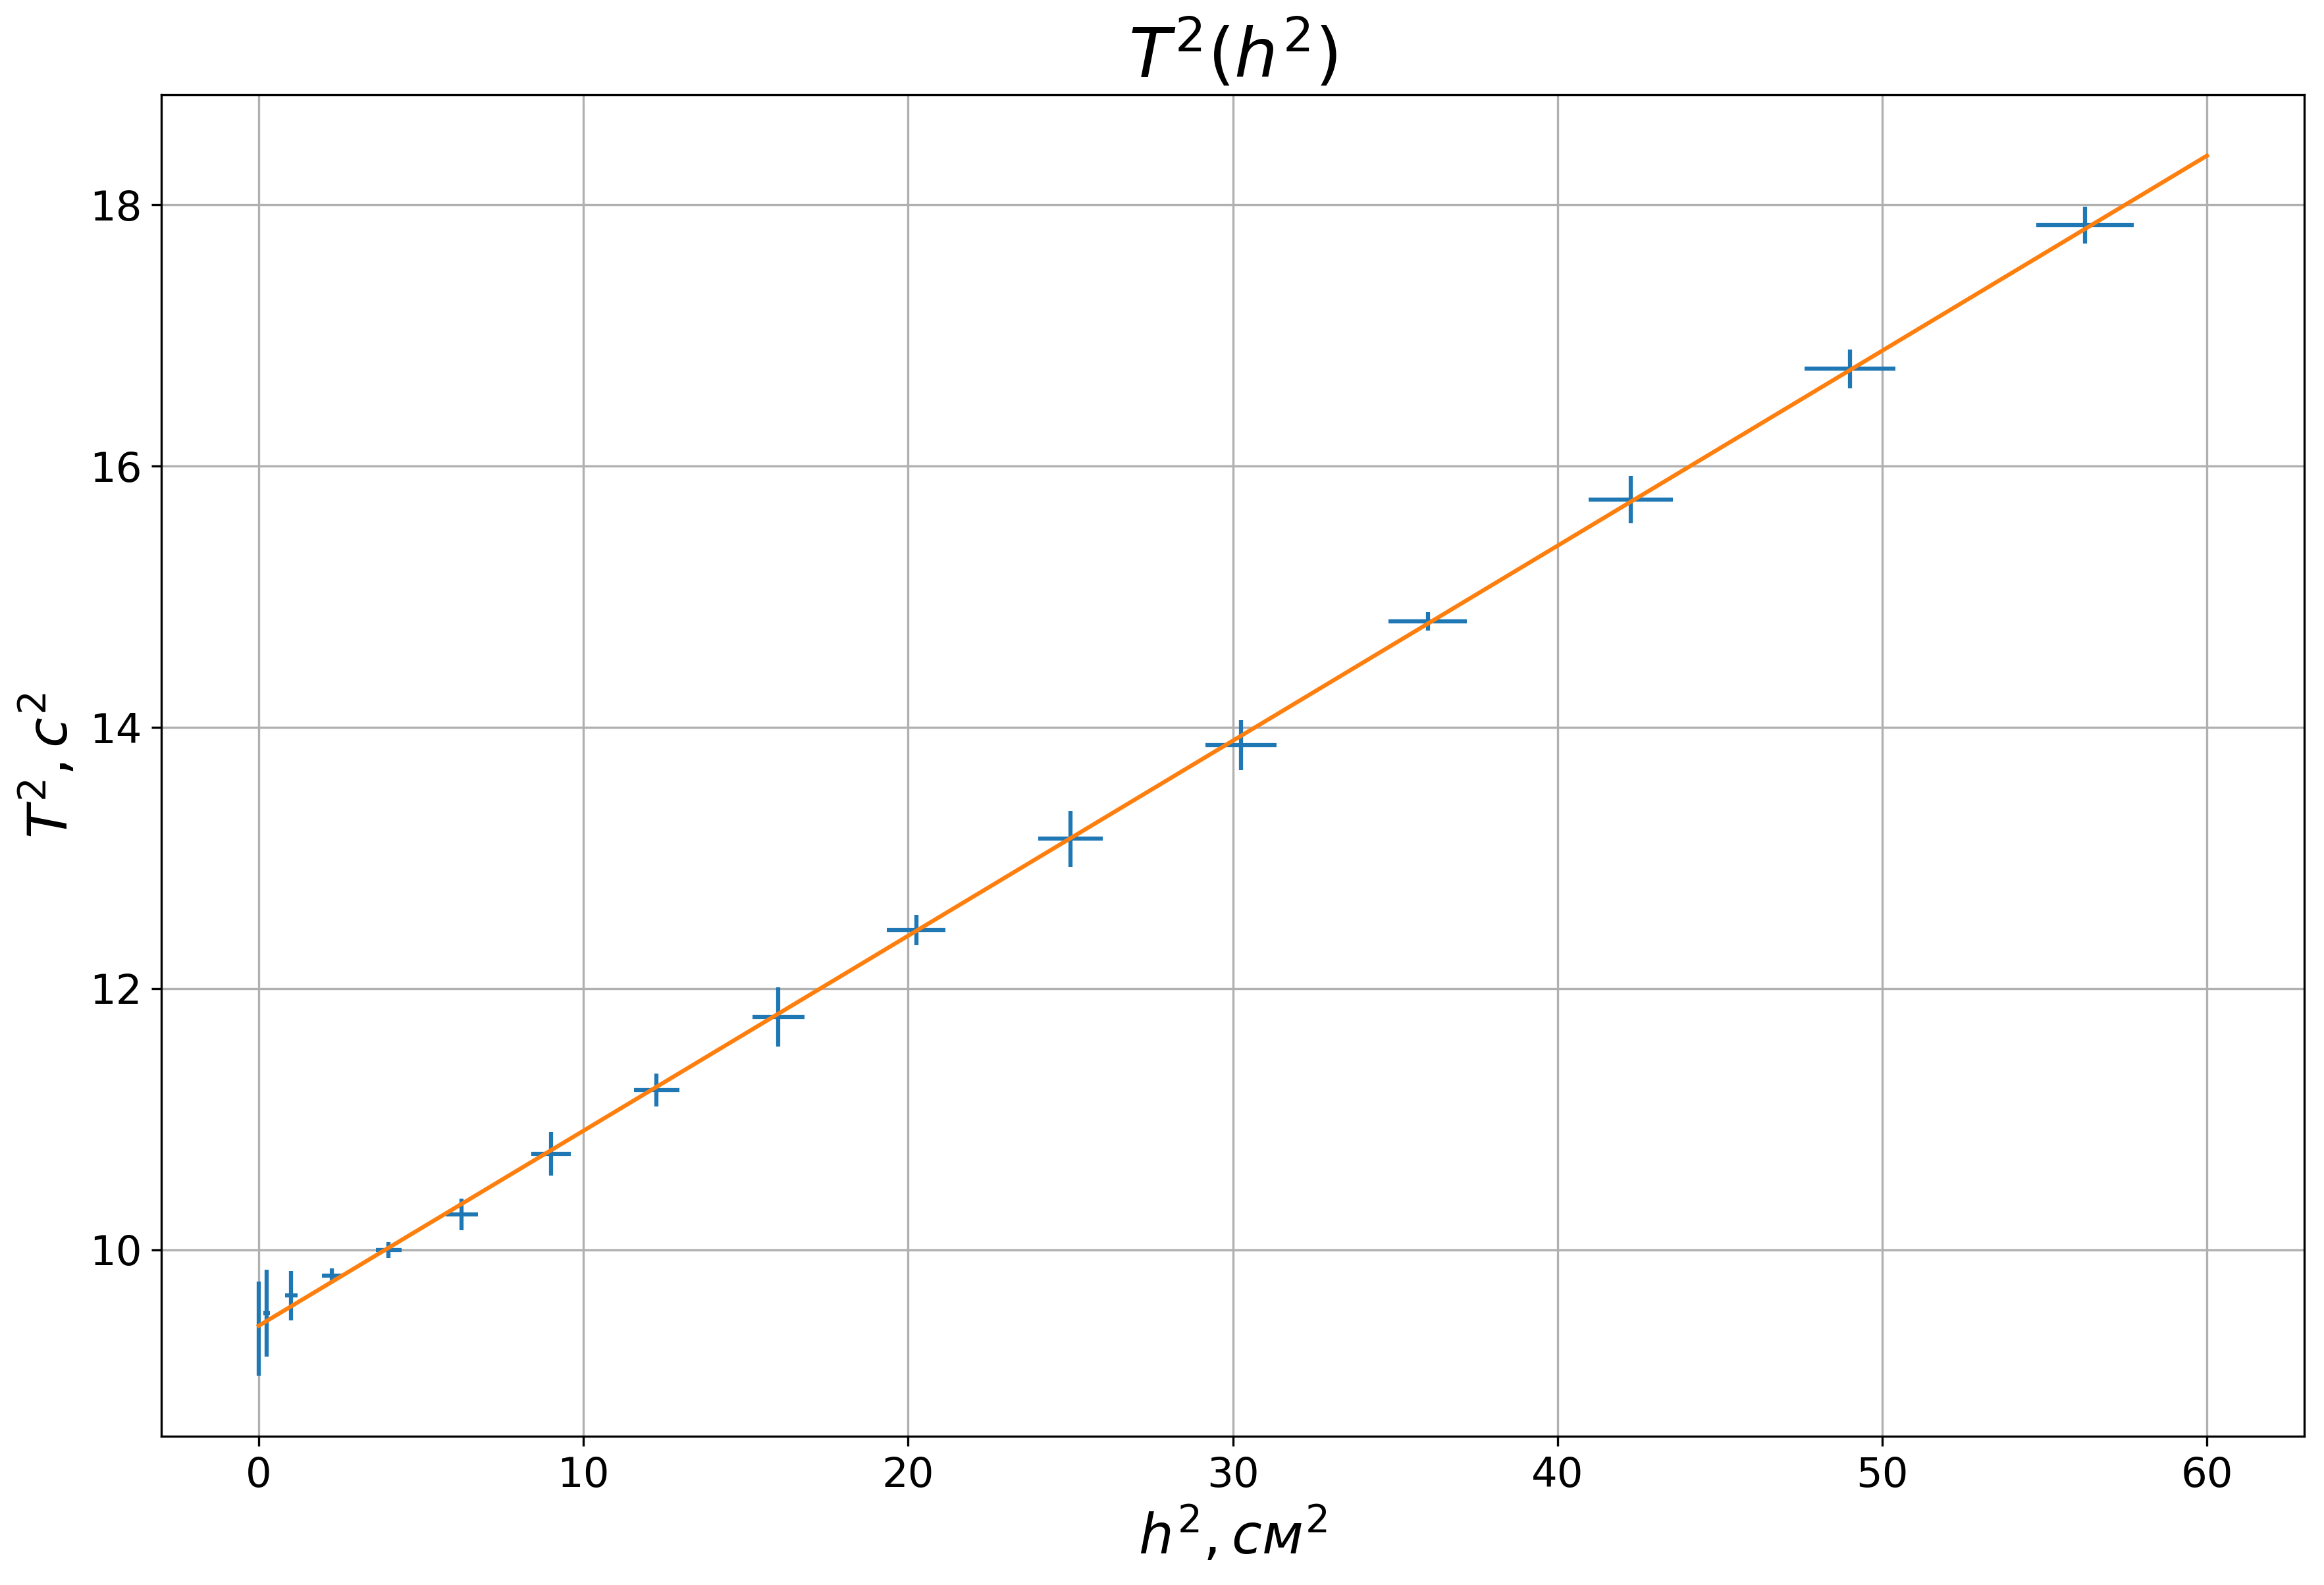

In [22]:
h = data['t'].index.to_numpy()
T = data['t'].to_numpy()

a, b = np.polyfit(h**2, T**2, deg=1)

plt.figure(figsize=(14, 9), dpi=300)

plt.grid(True)
plt.title(r"$T^2(h^2)$", fontsize=25)
plt.xlabel(r"$h^2, см^2$", fontsize=20)
plt.ylabel(r"$T^2, с^2$", fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.errorbar(h**2, T**2, xerr=2*h*0.1, yerr=2*T*data['dT'],linestyle='')
plt.plot([0, 60], [b, 60*a+b])

print(f'{a=}')
print(f'{b=}')
plt.savefig('../pictures/plot.png')

In [23]:
X = h**2
Y = T**2
x = np.mean(X)
y = np.mean(Y)
N = len(X)
Sx = np.sum((X)**2)/N - x**2
Sy = np.sum((Y)**2)/N - y**2
err_a = 2*np.sqrt((Sy/Sx - a**2)/(N-2))
err_a

0.001260617249656558

In [24]:
err_b=err_a*np.sqrt(np.sum(X**2)/N)
err_b

0.03327005726981877

In [25]:
K = k*10000
M = 1.4424
M/(K*(M+m_no_load))

0.1462242950382673